In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


## Hyper parameters

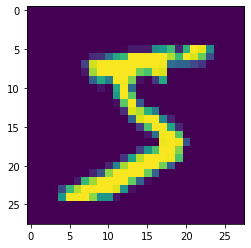

(60000, 784) (60000, 10)


In [2]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()
n_outputs = len(np.unique(y_train))
image_size = x_train.shape[1]

plt.imshow(x_train[0])
plt.show()

x_train = x_train.reshape((-1,image_size * image_size)).astype('float32')/255
x_test = x_test.reshape((-1,image_size * image_size)).astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

hidden_layers = [256, 256]
n_inputs = image_size * image_size
n_epochs = 10
batch_size = 32
m_train = x_train.shape[0]
print(x_train.shape,y_train.shape)

In [3]:
with tf.name_scope('placeholders'):
    x_p = tf.placeholder(dtype=tf.float32,shape=[None, n_inputs],name='x_p')
    y_p = tf.placeholder(dtype=tf.float32,shape=[None, n_outputs],name='y_p')
    keep_prob_p = tf.placeholder(dtype=tf.float32,name='keep_prop')

In [4]:
with tf.name_scope('hidden_layer_1'):
    weight_1 = tf.Variable(tf.random_normal(stddev=0.01, shape=(n_inputs,hidden_layers[0])), dtype=tf.float32,name='w_1')
    bias_1 = tf.Variable(tf.random_normal(stddev=0.01, shape=(hidden_layers[0],)), dtype=tf.float32,name='b_1')
    hidden_layer_1 = tf.nn.relu(tf.matmul(x_p,weight_1) + bias_1)
    hidden_layer_1 = tf.nn.dropout(hidden_layer_1,keep_prob=keep_prob_p)
    

W0722 20:05:54.655993  1712 deprecation.py:506] From <ipython-input-4-3fe6f9feace3>:5: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
with tf.name_scope('hidden_layer_2'):
    weight_2 = tf.Variable(tf.random_normal(stddev=0.01, shape=(hidden_layers[0],hidden_layers[1])), dtype=tf.float32,name='w_2')
    bias_2 = tf.Variable(tf.random_normal(stddev=0.01, shape=(hidden_layers[1],)), dtype=tf.float32,name='b_2')
    hidden_layer_2 = tf.nn.relu(tf.matmul(hidden_layer_1,weight_2) + bias_2)
    hidden_layer_2 = tf.nn.dropout(hidden_layer_2,keep_prob=keep_prob_p)

In [6]:
with tf.name_scope('ouput_layer'):
    weight_output = tf.Variable(tf.random_normal(stddev=0.01, shape=(hidden_layers[-1], n_outputs)), dtype=tf.float32,name='w_outputs')
    bias_output = tf.Variable(tf.random_normal(stddev=0.01, shape=(n_outputs,)), dtype=tf.float32,name='b_outputs')
    logits = tf.matmul(hidden_layer_2,weight_output) + bias_output
    y_predict_t = tf.nn.softmax(logits)

In [7]:
with tf.name_scope('accuracy'):
    equallity_check = tf.equal(tf.argmax(y_predict_t,axis=1),tf.argmax(y_p,axis=1))
    accuracy_op = tf.reduce_mean(tf.cast(equallity_check,tf.float32))


In [8]:
with tf.name_scope('loss'):
    entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_p)
    loss_op = tf.reduce_mean(entropy)

W0722 20:05:54.790743  1712 deprecation.py:323] From <ipython-input-8-f71e65a31072>:2: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [9]:
with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer().minimize(loss_op)

In [10]:
with tf.name_scope('summary'):
    tf.summary.scalar('loss', loss_op)
    merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tf_logs',tf.get_default_graph())

In [12]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    step = 1
    for epoch in range(1 , n_epochs + 1):
        pos = 0
        while pos < m_train:
            x_batch = x_train[pos: pos + batch_size]
            y_batch = y_train[pos: pos + batch_size]
            
            feed_dict = {x_p: x_batch, y_p: y_batch,keep_prob_p:0.5}
            summary, _ = sess.run([merged, optimizer],feed_dict=feed_dict)
            train_writer.add_summary(summary, step)
        
#             print(f'epoch: {epoch}, step:{step}, loss_value: {loss_value}')
            
            step += 1
            pos += batch_size
        y_predict = sess.run(y_predict_t, feed_dict={x_p: x_test,keep_prob_p:1})
        acc = accuracy_score(y_true=np.argmax(y_test,axis=1),y_pred=np.argmax(y_predict,axis=1))
        accuracy_value,loss_value = sess.run([accuracy_op,loss_op], feed_dict={x_p: x_test, y_p:y_test, keep_prob_p:1})
        print(f'test accuracy(tensor): {accuracy_value}')
        print(f'test accuracy: {acc},loss value: {loss_value}')
            
    

test accuracy(tensor): 0.9459999799728394
test accuracy: 0.946,loss value: 0.1728910207748413
test accuracy(tensor): 0.9624000191688538
test accuracy: 0.9624,loss value: 0.12553109228610992
test accuracy(tensor): 0.9677000045776367
test accuracy: 0.9677,loss value: 0.11311735957860947
test accuracy(tensor): 0.9714000225067139
test accuracy: 0.9714,loss value: 0.09969038516283035
test accuracy(tensor): 0.9699000120162964
test accuracy: 0.9699,loss value: 0.09671937674283981
test accuracy(tensor): 0.9757999777793884
test accuracy: 0.9758,loss value: 0.08983563631772995
test accuracy(tensor): 0.9753000140190125
test accuracy: 0.9753,loss value: 0.08866611868143082
test accuracy(tensor): 0.9732999801635742
test accuracy: 0.9733,loss value: 0.09288728982210159
test accuracy(tensor): 0.9722999930381775
test accuracy: 0.9723,loss value: 0.09575752913951874
test accuracy(tensor): 0.975600004196167
test accuracy: 0.9756,loss value: 0.0833231583237648


*:)*